# Final Project Submission

Please fill out:

* Student name: Elsie chieng, Richard, Taracha, Cindy King'ori, Peter Muthoma
* Student pace: Part time
* Scheduled project review data/time: 11/09/2023, 6:00am
* Instructor name:Ms. Asha Deen
* Blog post URL:

# <font color='goldenrod'> King County House Sales Regression Analysis

![Image Alt Text](https://image.slidesdocs.com/responsive-images/background/city-building-estate-real-sales-home-urban-powerpoint-background_0316dc0da1__960_540.jpg)

## <font color='goldenrod'> Project Overview
This project revolves around employing multiple linear regression modeling to scrutinize real estate transactions within a northwestern county.

## <font color='goldenrod'> Business Problem
Our chosen stakeholder for this project is a real estate agency specializing in assisting homeowners with buying and selling properties. The pressing business problem centers on the agency's need to provide homeowners with informed guidance on how specific home renovations can potentially enhance the estimated value of their properties and the extent of such improvements.

**Stakeholders:**
The primary stakeholders in this project are:
1. **Homeowners:** They seek guidance on increasing the value of their homes through renovations.
2. **Real Estate Agency:** The agency is keen on offering valuable advice to homeowners and facilitating property transactions.

This analysis aims to empower homeowners with data-driven insights to make informed decisions regarding property renovations and, in turn, support the real estate agency in providing expert guidance to its clients

## <font color='goldenrod'> Business Understanding
King County, situated within the state of Washington in the United States, encompasses a diverse array of housing attributes, including but not limited to bedroom count, bathroom-to-bedroom ratio, square footage of both the house and lot, waterfront presence, scenic views, structural condition, county-assigned grade, construction year, renovation year, and geographic location.

Understanding house prices and their spatial distribution holds paramount importance for real estate stakeholders, particularly in metropolitan areas. External customers seeking to buy or sell properties in King County must make informed decisions based on various property parameters.

The primary objective of this study is to employ statistical analysis to discern the interdependencies between these variables and house prices. We aim to identify the factors that exert significant influence on housing prices and those that have minimal impact. Ultimately, our goal is to provide actionable recommendations to stakeholders.

This analysis relies on statistical tools, including correlation and regression. Insights are derived from scatter plots, regression analysis, and histograms, enabling us to make data-driven recommendations to support the decision-making process of stakeholders in the real estate market.

## Recording the Experimental Design

1. Load libraries and dataset.
2. Perform data cleaning where necessary.
3. Exploratory Data Analysis.
4. Compute correlations and drop highly correlated variables.
5. Split into 80% train and 20% test sets, apply Linear Regression, and make predictions.
6. Calculate RMSE and R-squared values.
7. Interpret and summarize findings.
8. Challenge the solution
9. Provide recommendations

## Data Understanding

These dataset provided was aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov. 

**Project Sources:**
- https://data.kingcounty.gov/
- https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

**The data was relevant to answering the question.**

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Data Type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>id</td>
      <td>Unique identifier of the house</td>
    </tr>
    <tr>
      <td>date</td>
      <td>Date of sale</td>
    </tr>
    <tr>
      <td>price</td>
      <td>Sell price</td>
    </tr>
    <tr>
      <td>bedrooms</td>
      <td>Number of bedrooms</td>
    </tr>
    <tr>
      <td>bathrooms</td>
      <td>Number of bathrooms</td>
    </tr>
    <tr>
      <td>sqft_liv</td>
      <td>Size of interior space in square feet</td>
    </tr>
    <tr>
      <td>sqft_lot</td>
      <td>Size of land lot in square feet</td>
    </tr>
    <tr>
      <td>floors</td>
      <td>Number of floors</td>
    </tr>
    <tr>
      <td>waterfront</td>
      <td>'1' if property has a waterfront, '0' if not</td>
    </tr>
    <tr>
      <td>view</td>
      <td>An index from 0 to 4 of how good the property's view is</td>
    </tr>
    <tr>
      <td>condition</td>
      <td>Condition of the house, ranked from 1 to 5, 5 being the greatest condition</td>
    </tr>
    <tr>
      <td>grade</td>
      <td>Classification by construction material and worksmanship quality. Numeric scale with higher numbers being better. For more information see the King County glossary</td>
    </tr>
    <tr>
      <td>sqft_above</td>
      <td>Square feet above ground</td>
    </tr>
    <tr>
      <td>sqft_below</td>
      <td>Square feet below ground</td>
    </tr>
    <tr>
      <td>yr_built</td>
      <td>Year built</td>
    </tr>
    <tr>
      <td>yr_renov</td>
      <td>Year renovated. '0' if never renovated</td>
    </tr>
    <tr>
      <td>zipcode</td>
      <td>5 digit zip code</td>
    </tr>
    <tr>
      <td>lat</td>
      <td>Latitude</td>
    </tr>
    <tr>
      <td>long</td>
      <td>Longitude</td>
    </tr>
    <tr>
      <td>sqft_liv15</td>
      <td>Average size of interior space for closest 15 houses, in square feet</td>
    </tr>
    <tr>
      <td>sqft_lot15</td>
      <td>Average size of land lot for closest 15 houses, in square feet</td>
    </tr>
  </tbody>
</table>


### a) Specifying the Data Analysis Question

- Identify factors that contribute to the average price of a house
- Build a multiple linear regression model to predict the house price.
- Check for the assumptions of your model as well as perform k-fold (k=10) cross-validation while challenging the solution

### b) Defining the Metric for Success

**The project will be considered a success when we are able to fit linear regression to our data and make predictions.**

**While performing model selection/diagnosis, we was required to perform the following steps in an effort to check for the following assumptions:**

- Assess the linearity of the model (parameters)
- Assess heteroskedasticity
- Assess the normality of residual distribution
- Assess multicollinearity


## <font color='goldenrod'> Load Libraries and Dataset

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import scipy.stats as sp

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, cross_validate
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.pipeline import Pipeline, make_pipeline


# Show all columns (instead of cascading columns in the middle)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
# Don't show numbers as scientific notation
pd.set_option("display.float_format", "{:.2f}".format)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Read the csv file, storing it in df dataframe and previewing the data 
df = pd.read_csv('data\kc_house_data.csv')

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,Average,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,Average,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,Average,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,NONE,Average,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


## <font color='goldenrod'> Data Understanding

In [3]:
# Check the shape to see the number of columns and row
df.shape

(21597, 21)

The above dataset has 21,597 rows of data and 21 columns.

In [4]:
# Checking the general info about column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The above indicates that there are 6 columns that are in string format i.e.date, waterfront, view, condition, grade and sqft_basement.

In [5]:
#Check summary statistics
df.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


From the quick overview of our data, we identified the following:

* Minimum house price is 78,000. Maximum is 7,700,000. Most of the homes are priced between 322,000 and 645,000

* Data contains homes built from 1900 to 2015 with the mean year of construction at 1971

* Bedrooms column has max value as 33. This is a potential outlier and further investigation is required

After establishing a foundational understanding of our data, we proceeded to gather information essential to building the required models that is preparing and cleaning the data.

## <font color='goldenrod'> Data Preparation and Cleaning</font>

To begin with, we checked for the percentage of null values in the columns

In [6]:
#Check for percentage of null values in all columns
null_values = df.isna().sum()/len(df)*100

#Filter to obtain columns with null values
null_percentages = null_values[null_values > 0]
null_percentages

waterfront     11.00
view            0.29
yr_renovated   17.79
dtype: float64

From this we noted that:

1. Date column should be date time object
2. 'waterfront' ,view and yr renovated columns have null values which need to be replaced
3. sqft_basement data type is object instead of a number value
4. 'bedrooms' column has potential outliers

#### Date Column
Convert the date column to date time data type

In [7]:
# Convert the "date" column to datetime format
df["date"] = pd.to_datetime(df.date)

# Extract the year, month, day, and day of the week  from the "date" column and create new columns
df["year"] = df.date.dt.year
df["month"] = df.date.dt.month
df["day"] = df.date.dt.day
df["day_of_week"] = df.date.dt.day_name()

# Drop the original "date" column, as we've extracted the relevant date components
df = df.drop("date", axis=1)

In [8]:
df.head()
# This shows that the date column has been dropped

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,day_of_week
0,7129300520,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650,2014,10,13,Monday
1,6414100192,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639,2014,12,9,Tuesday
2,5631500400,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062,2015,2,25,Wednesday
3,2487200875,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000,2014,12,9,Tuesday
4,1954400510,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503,2015,2,18,Wednesday


#### Yr_renovated column
After examining this column, the houses with non-null values were considered renovated and those with null values were considered not renovated. A column is_renovated was created to contain binary encoding assigning 1 to renovated and 0 to not renovated houses.

In [9]:
#Replace null values in 'yr_renovated' with 0
df['yr_renovated'].fillna(0, inplace=True)

# df["is_renovated"] = np.where(df.yr_renovated == 0, 0, 1)
# df["yr_renovated"] = df.yr_renovated.replace(to_replace=0, value=np.nan)

#Create 'is_renovated' column and set values based on 'yr_renovated'
df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

#### View column

In [11]:
# Checking view column for number of null values
df['view'].isna().sum()

63

In [12]:
# Check view column counts of ratings
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

There are 63 null values and the NONE rating has the highest count at 19422. We decided to replace null with NONE as it is the value with the highest count.

In [13]:
#Replace NaN with None
df["view"].fillna(value = 'NONE', inplace = True)

#### Grade Column

In [14]:
#Check count of values in the grade column
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

The column has data type inconsistency where the values have both numerical and categorical values. To remove the inconsistency we chose to maintain the integer values

In [15]:
# Use use the str.extract() to  digits from the mixed' column
df['grade'] = df['grade'].str.extract('(\d+)')

# Convert the "grade" column to numeric (integer)
df['grade'] = pd.to_numeric(df['grade'], errors='coerce')

#### Waterfront column

In [16]:
# Checking waterfront column for number of null values
df['waterfront'].isna().sum()

2376

In [17]:
# Check waterfront column counts of ratings
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

Most common value in this column is NO with 19075 entries while YES has only 146. This means most of these houses don't have a waterfront hence it's safe to assume that the ones with missing values also don't have a waterfront. Replace the missing values with NO.

In [18]:
#Replace NaN with NO
df['waterfront'].fillna(value = 'NO', inplace = True)

#### Sqft_basement column
The column datatype os object however a look into the values in the column shows that there are numerical values

In [19]:
# Attempt to convert the column to numeric and catch errors
try:
    df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
except ValueError as e:
    # Print the error message which will contain information about the problematic values
    print("Error:", e)


Error: Unable to parse string "?" at position 6


From the sample we can see that there is a '?' value which is causing the difference in datatype for the column.

In [20]:
#Convert datatype to numeric replacing ? with NaN
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

#Check number of null values in column
df['sqft_basement'].isnull().sum()


454

Following the conversion of ? to null values, the next step is to replace the null values in the column with the mean

In [21]:
# Replace null values with mean value
df['sqft_basement'].fillna(df['sqft_basement'].mean(), inplace=True)

#### Check for duplicates

In [22]:
df.duplicated().sum() 

0

There are no duplicates

#### Check for outliers

In [31]:
# Getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(20)
outliers_df.max()

(6600, 30)


id                9834201205
price             7700000.00
bedrooms                  11
bathrooms               8.00
sqft_living            13540
sqft_lot             1651359
floors                  3.50
condition                  5
grade                     13
sqft_above              9410
sqft_basement        4820.00
yr_built                2015
yr_renovated         2015.00
zipcode                98199
lat                    47.78
long                 -121.31
sqft_living15           6210
sqft_lot15            871200
year                    2015
month                     12
day                       31
day_of_week        Wednesday
is_renovated               1
waterfront_NO              1
waterfront_YES             1
view_AVERAGE               1
view_EXCELLENT             1
view_FAIR                  1
view_GOOD                  1
view_NONE                  1
dtype: object

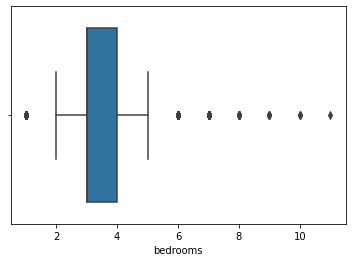

In [32]:
sns.boxplot(x=df['bedrooms']);

In [33]:
#Change outlier to 3 probably an entry error
df['bedrooms'].replace(33, 3, inplace=True)

#Remove the outlier 
# df = df[df['bedrooms'] != 33]

#### Encoding Categorical Variables

In [34]:
#Checking for categorical type variables
df.select_dtypes('object').sample(5)

,day_of_week
18780,Tuesday
20594,Tuesday
10957,Thursday
19463,Monday
13526,Monday


The view and waterfront columns using One Hot Encoding while the 'categorical' column was encoded using ordinal encoding

In [38]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,day_of_week,is_renovated,waterfront_NO,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,7129300520,221900.00,3,1.00,1180,5650,1.00,nan,7,1180,0.00,1955,0.00,98178,47.51,-122.26,1340,5650,2014,10,13,Monday,0,1,0,0,0,0,0,1
1,6414100192,538000.00,3,2.25,2570,7242,2.00,nan,7,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639,2014,12,9,Tuesday,1,1,0,0,0,0,0,1
2,5631500400,180000.00,2,1.00,770,10000,1.00,nan,6,770,0.00,1933,0.00,98028,47.74,-122.23,2720,8062,2015,2,25,Wednesday,0,1,0,0,0,0,0,1
3,2487200875,604000.00,4,3.00,1960,5000,1.00,nan,7,1050,910.00,1965,0.00,98136,47.52,-122.39,1360,5000,2014,12,9,Tuesday,0,1,0,0,0,0,0,1
4,1954400510,510000.00,3,2.00,1680,8080,1.00,nan,8,1680,0.00,1987,0.00,98074,47.62,-122.05,1800,7503,2015,2,18,Wednesday,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.00,3,2.50,1530,1131,3.00,nan,8,1530,0.00,2009,0.00,98103,47.70,-122.35,1530,1509,2014,5,21,Wednesday,0,1,0,0,0,0,0,1
21593,6600060120,400000.00,4,2.50,2310,5813,2.00,nan,8,2310,0.00,2014,0.00,98146,47.51,-122.36,1830,7200,2015,2,23,Monday,0,1,0,0,0,0,0,1
21594,1523300141,402101.00,2,0.75,1020,1350,2.00,nan,7,1020,0.00,2009,0.00,98144,47.59,-122.30,1020,2007,2014,6,23,Monday,0,1,0,0,0,0,0,1
21595,291310100,400000.00,3,2.50,1600,2388,2.00,nan,8,1600,0.00,2004,0.00,98027,47.53,-122.07,1410,1287,2015,1,16,Friday,0,1,0,0,0,0,0,1


In [35]:
df = pd.get_dummies(df, columns=['waterfront', 'view'], dtype=int)

KeyError: "None of [Index(['waterfront', 'view'], dtype='object')] are in the [columns]"

In [36]:
# Define the mapping of categories to numerical values
condition_mapping = {'Poor': 1,'Fair': 2,'Average': 3,'Good': 4,'Very Good': 5}

# Apply mapping to column
df['condition'] = df['condition'].map(condition_mapping)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   condition       0 non-null      float64
 8   grade           21597 non-null  int64  
 9   sqft_above      21597 non-null  int64  
 10  sqft_basement   21597 non-null  float64
 11  yr_built        21597 non-null  int64  
 12  yr_renovated    21597 non-null  float64
 13  zipcode         21597 non-null  int64  
 14  lat             21597 non-null  float64
 15  long            21597 non-null  float64
 16  sqft_living15   21597 non-null  int64  
 17  sqft_lot15      21597 non-null 

All the necessary columns are now either floats or integers. 

## <font color='goldenrod'> Exploratory Data Analysis(EDA)

Looking at the distribution of the dataset now.

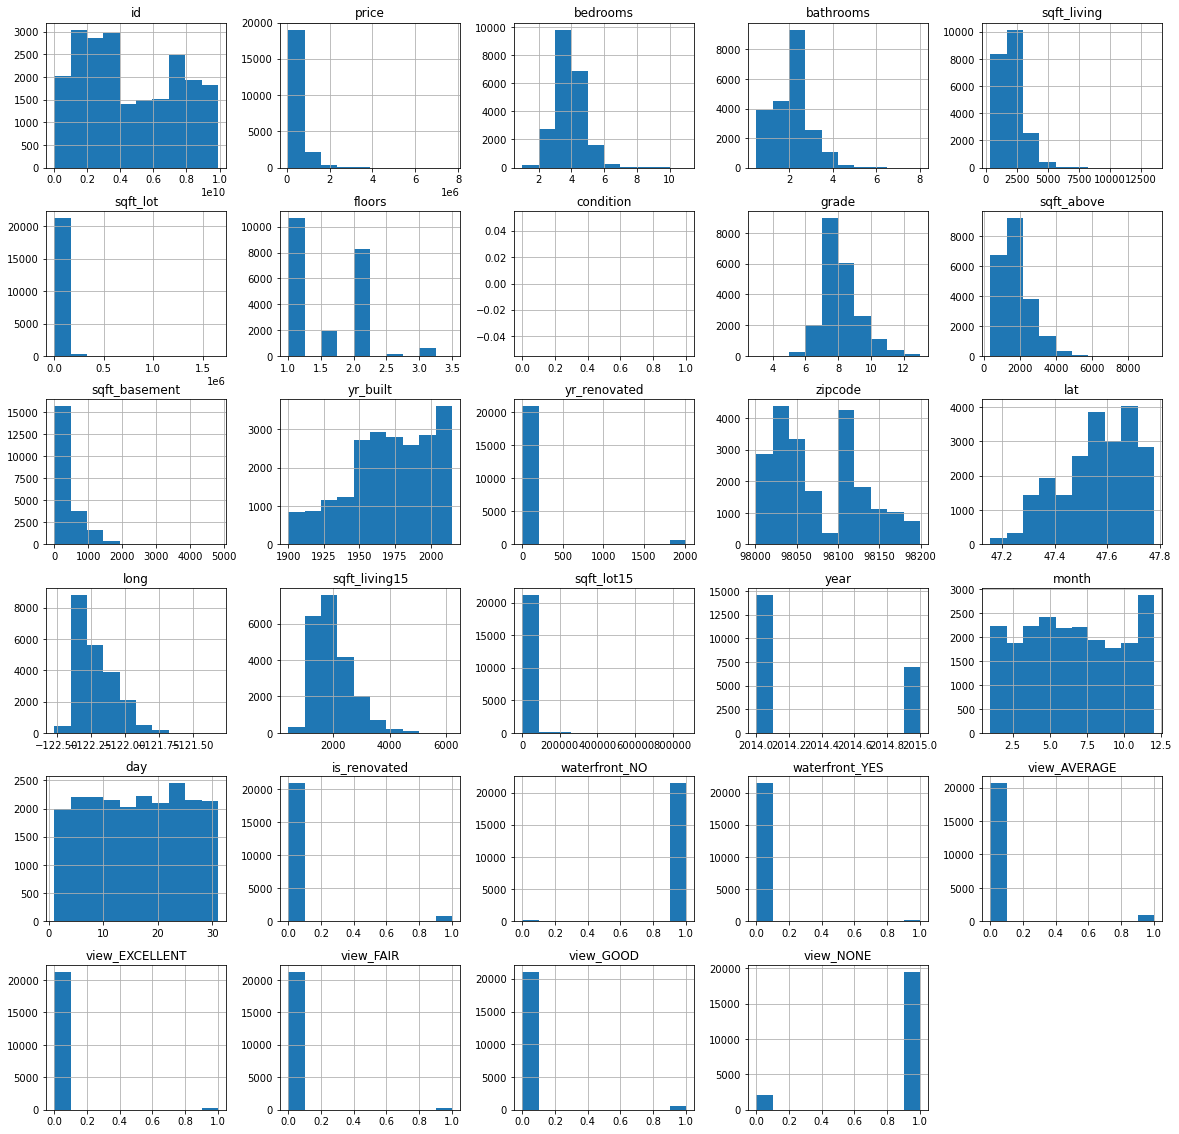

In [43]:
df.hist(figsize=(20,20));

From the above, we can make the following observations:
* Majority of the data does not follow a normal distribution though it is not necessary for it to follow normal distributions as regression analysis is not sensitive to this.
* Majority of the homes were after the year 2000.
* Most homes in the dataset as shown in the graph do not have a basement

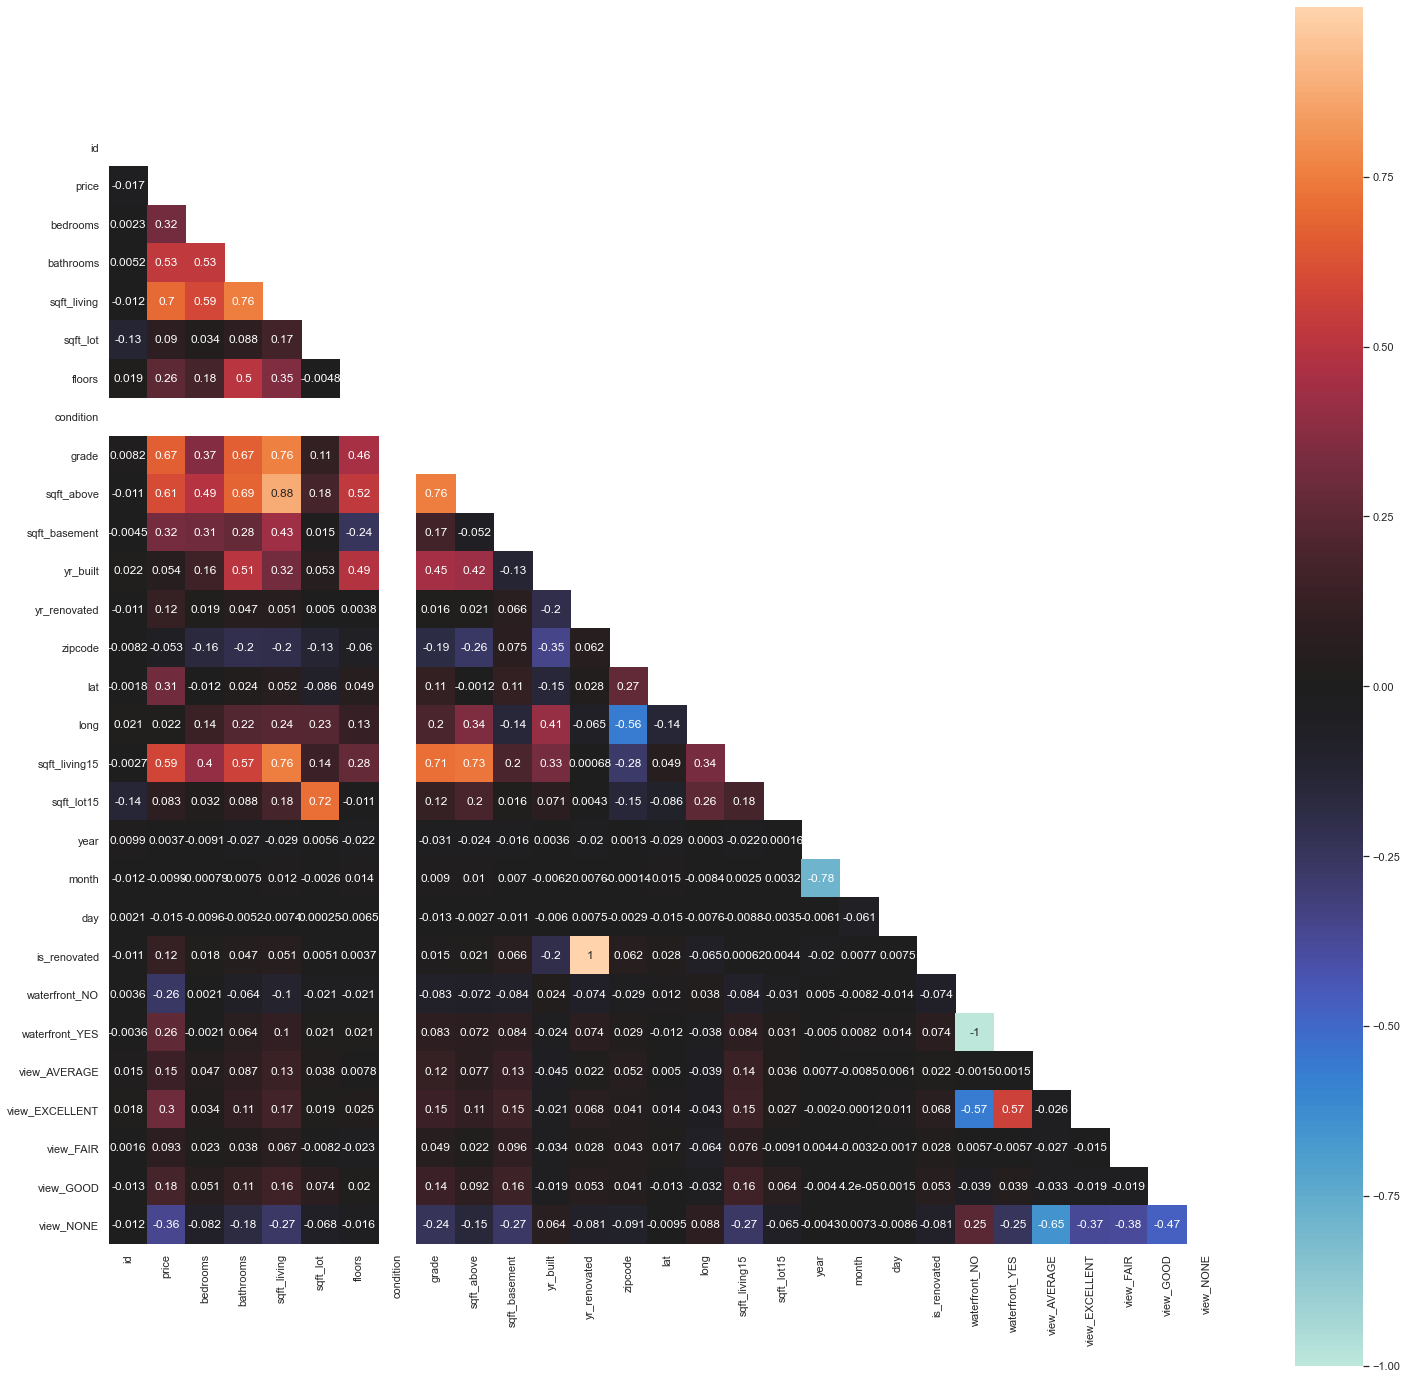

In [51]:
# Find correlation between features using a heatmap visualisation
fig, ax = plt.subplots(figsize=(25, 25))
ax = sns.heatmap(df.corr(), center=0, square=True, annot=True, mask=np.triu(np.ones_like(df.corr(), dtype=bool)))

Independent variable = All features of a house
Dependent variable = Price
This means that the price of a house is dependednt on features such as the number of rooms, if there is any renovation,
if there is a view from the house and the like. In this case, it is all the columns apart from price. 

Looking for specific relationships between price and other variables.

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\envs\\learn-env\\lib\\site-packages\\matplotlib\\pyplot.py'>

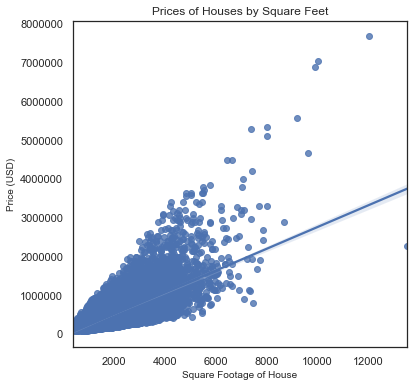

In [53]:
# Relationship between square footage and price
fig, ax = plt.subplots(figsize=(6,6))
sns.regplot(data=df, x='sqft_living', y='price')

ax.set_xlabel('Square Footage of House', fontsize=10)
ax.set_ylabel('Price (USD)', fontsize=10)
ax.set_title('Prices of Houses by Square Feet', fontsize=12)
ax.ticklabel_format(style='plain')

plt

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\envs\\learn-env\\lib\\site-packages\\matplotlib\\pyplot.py'>

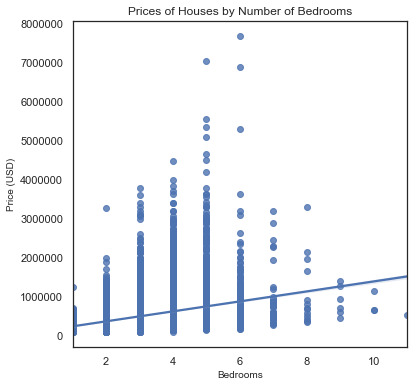

In [54]:
# Relationship between price and number of bedrooms
fig, ax = plt.subplots(figsize=(6,6))
sns.regplot(data=df, x='bedrooms', y='price')

ax.set_xlabel('Bedrooms', fontsize=10)
ax.set_ylabel('Price (USD)', fontsize=10)
ax.set_title('Prices of Houses by Number of Bedrooms', fontsize=12)
ax.ticklabel_format(style='plain')

plt

From the above graph, we can tell that as the number of bedrooms increase so does the price of the house, giving a positive linear relationship.

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\envs\\learn-env\\lib\\site-packages\\matplotlib\\pyplot.py'>

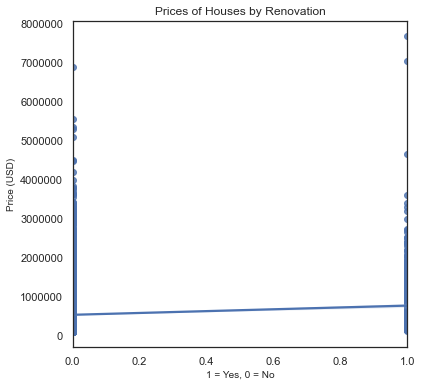

In [55]:
# Relationship between renovation and price of house
fig, ax = plt.subplots(figsize=(6,6))
sns.regplot(data=df, x='is_renovated', y='price')

ax.set_xlabel('1 = Yes, 0 = No', fontsize=10)
ax.set_ylabel('Price (USD)', fontsize=10)
ax.set_title('Prices of Houses by Renovation', fontsize=12)
ax.ticklabel_format(style='plain')

plt

The above graph indicates that there is an increase in price if a house has had some rennovations.

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\envs\\learn-env\\lib\\site-packages\\matplotlib\\pyplot.py'>

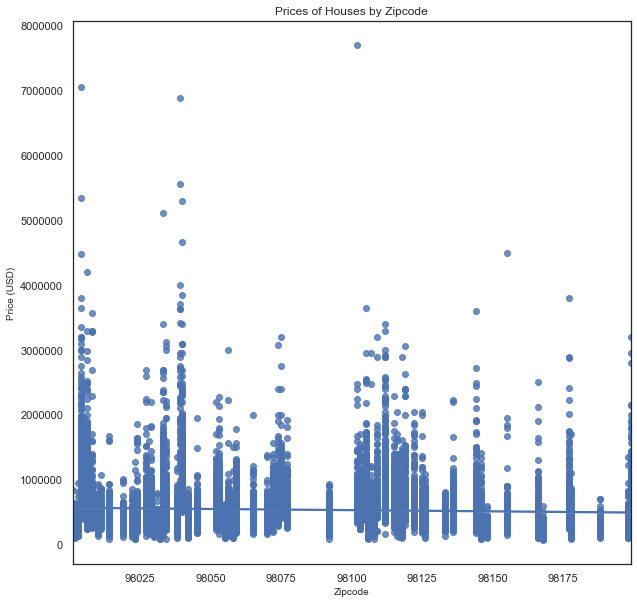

In [66]:
# Relationship between the price and zipcode
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(data=df, x='zipcode', y='price')

ax.set_xlabel('Zipcode', fontsize=10)
ax.set_ylabel('Price (USD)', fontsize=10)
ax.set_title('Prices of Houses by Zipcode', fontsize=12)
ax.ticklabel_format(style='plain')

plt

In [67]:
house_counts = df['zipcode'].value_counts().reset_index()
house_counts.columns = ['Zipcode', 'Number of Houses']

print(house_counts)

    Zipcode  Number of Houses
0     98103               602
1     98038               589
2     98115               583
3     98052               574
4     98117               553
..      ...               ...
65    98102               104
66    98010               100
67    98024                80
68    98148                57
69    98039                50

[70 rows x 2 columns]


In [71]:
house_counts.describe()

,Zipcode,Number of Houses
count,70.00,70.00
mean,98077.30,308.53
std,56.62,142.22
min,98001.00,50.00
25%,98029.25,204.25
50%,98067.50,282.50
75%,98117.75,408.25
max,98199.00,602.00


The following can be derived from the above graph and table:

1. **Count:** There are a total of 70 unique zip codes in the dataset, indicating that information about houses located in these 70 different zip codes is included in the dataset.
2. **Minimum (Min):** The smallest zip code in the dataset is 98001.00. This is the lowest value among all the zip codes.
3. **Maximum (Max):** The largest zip code in the dataset is 98199.00. This is the highest value among all the zip codes.